# Price prediction model for car data-set

Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #for testing 

Data Collecting and Pre-Processing 

In [2]:
#Importing data
data = pd.read_csv('/kaggle/input/carsdata/car_data.csv')

In [3]:
#Take a look at our data-set
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Taking the shape of our data
data_shape = data.shape
data_shape

(301, 9)

In [5]:
#Start Exploring the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#It seems like we don't have any nan value 
#Lets describe our data 
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#Let's describe categorical data 
#We will do that to see the distrebution of our data 
#We will be doing that by seeing all values of each categorical variable

In [8]:
data['Seller_Type'].value_counts()


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [9]:
data['Seller_Type'].value_counts()


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [10]:
data['Fuel_Type'].value_counts()


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
#We know that our ml model can't understand object(strings) , so we need to encode those categotical data

In [12]:
#Encoding Data
#We can encode theme manually since they don't have lot of values 


In [13]:
data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


/tmp/ipykernel_13/2859518233.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
/tmp/ipykernel_13/2859518233.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
/tmp/ipykernel_13/2859518233.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

In [14]:
#Cheking the data
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
#we will drop Owner col since it won't help i predecting price 
data.drop('Owner' , axis=1 ,inplace =True)

In [16]:
#Splitting Data 
X = data.drop(['Car_Name','Selling_Price'] , axis=1)
Y = data.Selling_Price

In [17]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)

Model Training 

Linear Regression 

In [18]:
lin = LinearRegression()

In [19]:
#Fitting our model
lin.fit(x_train , y_train)

LinearRegression()

In [20]:
lin.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [21]:
coefficients = lin.coef_
intercept = lin.intercept_

# Print the coefficients and intercept
print("Coefficients (Beta values):", coefficients)
print("Intercept (Beta_0 value):", intercept)

Coefficients (Beta values): [ 4.68429985e-01  5.52610488e-01 -4.48811434e-06  1.14935633e+00
 -3.46136815e-01  4.82567807e-01]
Intercept (Beta_0 value): -942.8265997705913


In [22]:
#Then we need to predict 
y_pre = lin.predict(x_train)

In [23]:
#Then we check our linear model 
#We will apply our testing functions ( const_functions )


In [24]:
err = mean_squared_error(y_train , y_pre)
err

3.030489420496972

In [25]:
err = r2_score(y_train , y_pre)
err

0.8595745822530934

In [26]:
err = mean_absolute_error(y_train , y_pre)
err

1.1620428090391448

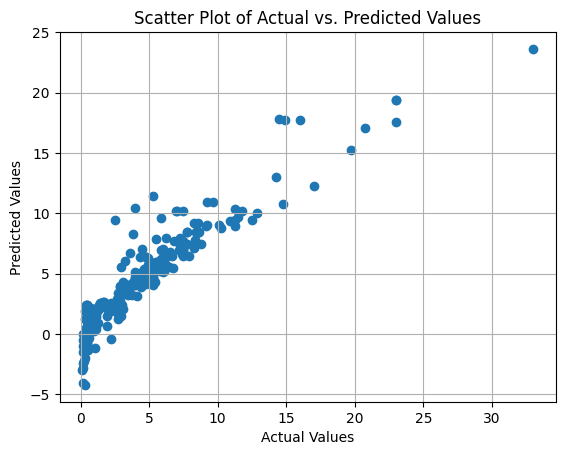

In [27]:
plt.scatter(y_train, y_pre)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.grid(True)
plt.show()

Testing our data

In [28]:
y_test_pred = lin.predict(x_test)

In [29]:
err = mean_squared_error(y_test , y_test_pred)
err

6.187653707689193

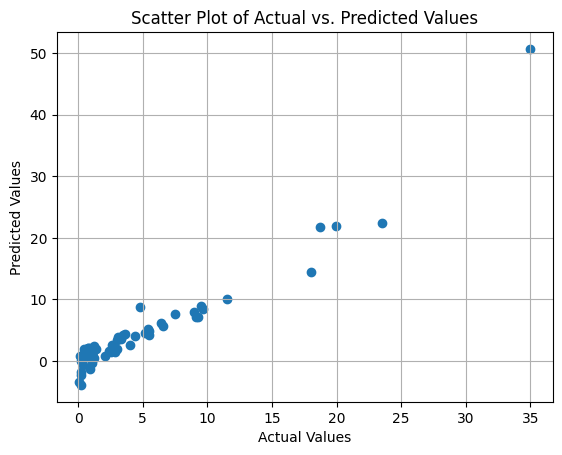

In [30]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.grid(True)
plt.show()

Lasso regression 

In [31]:
lasso_reg = Lasso()

In [32]:
lasso_reg.fit(x_train , y_train)

Lasso()

In [33]:
coefficients = lasso_reg.coef_
intercept = lasso_reg.intercept_

# Print the coefficients and intercept
print("Coefficients (Beta values):", coefficients)
print("Intercept (Beta_0 value):", intercept)

Coefficients (Beta values): [ 3.32728907e-01  5.86809967e-01 -7.78771389e-06  0.00000000e+00
 -0.00000000e+00  0.00000000e+00]
Intercept (Beta_0 value): -669.488645948929


In [34]:
y_pre = lasso_reg.predict(x_train)

In [35]:
err = mean_squared_error(y_train , y_pre)
err

3.4445556018319414

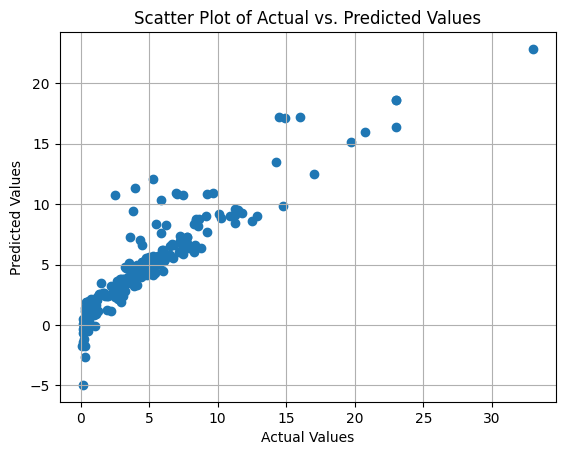

In [36]:
plt.scatter(y_train, y_pre)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.grid(True)
plt.show()

In [37]:
y_test_pred = lasso_reg.predict(x_test)

In [38]:
err = mean_squared_error(y_test , y_test_pred)
err

7.370917178237407

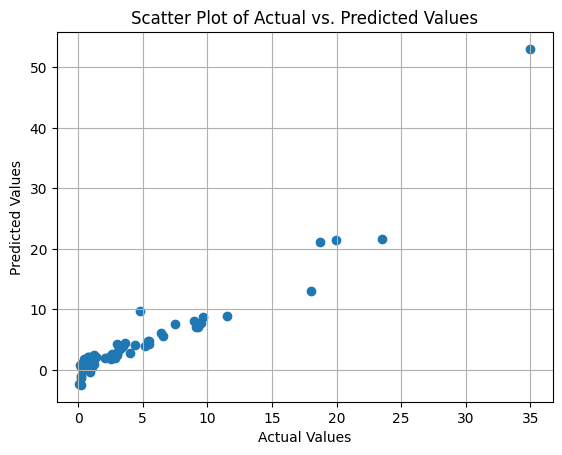

In [39]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.grid(True)
plt.show()